In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
from sklearn.model_selection import train_test_split


In [2]:
Day = pd.read_csv('day_input.csv')

In [81]:
X = Day.iloc[:,:-1]
Y = Day.iloc[:,-1:]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.3, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size= 0.3, random_state=20)

In [82]:
X_train

,X1,X2
321,-0.348879,-0.008501
2589,0.435360,0.194175
1615,0.087043,0.155040
430,-0.275009,0.157746
2664,0.569602,0.048235
...,...,...
1914,0.193111,0.043477
759,-0.298096,-0.018674
2736,0.583099,0.002136
1361,-0.027857,-0.005328


In [84]:
X_test

,X1,X2
148,-0.272879,0.172305
1058,-0.271761,-0.160062
2602,0.439202,0.068881
470,-0.342303,0.017630
1156,-0.229333,-0.172152
...,...,...
1760,0.072947,0.041823
856,-0.240663,-0.025007
1665,0.101484,0.088374
1594,0.089877,0.148860


In [69]:
X_train.shape

(1406, 2)

In [70]:
X_val

,X1,X2
1490,0.139072,0.222666
2229,0.177222,-0.090854
2041,0.144806,-0.092167
511,-0.332478,0.019214
439,-0.240866,0.202753
...,...,...
304,-0.358706,0.032179
532,-0.354650,-0.032972
849,-0.245343,-0.040135
1049,-0.247916,-0.155036


In [110]:
model = keras.Sequential()

model.add(layers.LSTM(64, activation='relu', input_shape=(2, 1)))
model.add(layers.Dense(1)),

model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 64)                16896     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [111]:
X_train.shape

(1406, 2)

In [112]:
X_train.values.reshape(-1,2,1).shape

(1406, 2, 1)

In [113]:
y_train.shape

(1406, 1)

In [114]:
model.compile(
    loss = keras.losses.mean_squared_error, optimizer='adam'
)

In [115]:
history  = model.fit(x = X_train.values.reshape(-1,2,1), y = y_train,
epochs= 200,
batch_size= 32,
validation_data=(X_val.values.reshape(-1,2,1), y_val)
)

Epoch 1/200
44/44 [==============================] - 2s 22ms/step - loss: 0.3283 - val_loss: 0.1854
Epoch 2/200
44/44 [==============================] - 1s 19ms/step - loss: 0.0752 - val_loss: 0.0302
Epoch 3/200
44/44 [==============================] - 1s 19ms/step - loss: 0.0253 - val_loss: 0.0249
Epoch 4/200
44/44 [==============================] - 1s 19ms/step - loss: 0.0220 - val_loss: 0.0221
Epoch 5/200
44/44 [==============================] - 1s 19ms/step - loss: 0.0188 - val_loss: 0.0187
Epoch 6/200
44/44 [==============================] - 1s 19ms/step - loss: 0.0154 - val_loss: 0.0154
Epoch 7/200
44/44 [==============================] - 1s 19ms/step - loss: 0.0129 - val_loss: 0.0130
Epoch 8/200
44/44 [==============================] - 1s 19ms/step - loss: 0.0114 - val_loss: 0.0117
Epoch 9/200
44/44 [==============================] - 1s 19ms/step - loss: 0.0104 - val_loss: 0.0107
Epoch 10/200
44/44 [==============================] - 1s 19ms/step - loss: 0.0096 - val_loss: 0.0099

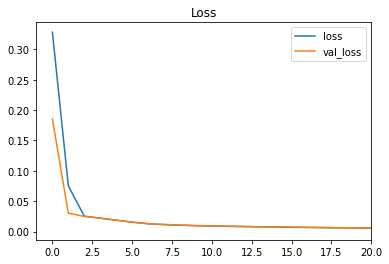

In [116]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlim(-1, 20)
plt.title('Loss')
plt.legend()
plt.show()

In [117]:
model.evaluate(X_test.values.reshape(-1,2,1), y_test)

27/27 [==============================] - 0s 2ms/step - loss: 0.0026


0.0025820976588875055

In [119]:
answer = pd.DataFrame(y_test).reset_index(drop = True)

In [88]:
X_test.shape

(861, 2)

In [120]:
answer['predict'] = model.predict(X_test.values.reshape(-1,2,1))

In [121]:
answer

,Y,predict
0,0.428767,0.500532
1,0.908405,0.902019
2,0.242013,0.244996
3,0.661868,0.677214
4,0.932949,0.917812
...,...,...
856,0.751817,0.739683
857,0.798026,0.801656
858,0.773207,0.737705
859,0.793912,0.712243


In [122]:
answer.columns = ['answer', 'predict']

<AxesSubplot:xlabel='predict', ylabel='answer'>

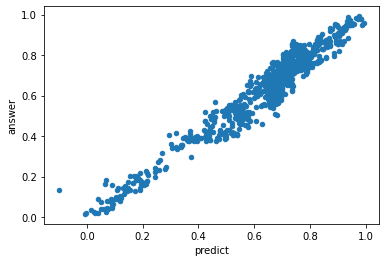

In [123]:
answer.plot.scatter(x = 'predict', y= 'answer')

In [70]:
answer['predict']

0      0.486349
1      0.914559
2      0.224924
3      0.667321
4      0.920633
         ...   
856    0.749409
857    0.838827
858    0.739694
859    0.734788
860    0.525093
Name: predict, Length: 861, dtype: float32

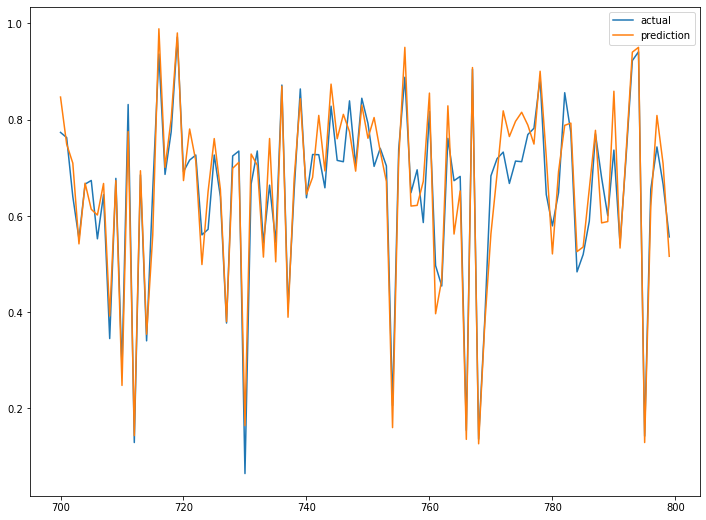

In [124]:
plt.figure(figsize=(12, 9))
plt.plot(answer['predict'][700:800], label='actual')
plt.plot(answer['answer'][700:800], label='prediction')
plt.legend()
plt.show()

In [125]:
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(answer['predict'],y_test))
print(r2_score(answer['predict'],y_test))

0.002582097763773515
0.9334474159849458
